In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from core.augmenter import Augmenter
from core.dataset import Dataset
from utils.image import visualize_bboxes

C:\Users\jules\anaconda3\envs\IA_SOFTWARE\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
dataset = Dataset(modeltype='object_detection')
dataset.from_coco_format(
    labeling_data_dirpath='../project-11-at-2022-09-26-15-40-4d1247ab/project-11-at-2022-09-26-15-40-4d1247ab/result.json', 
    imgs_dirpath='../project-11-at-2022-09-26-15-40-4d1247ab/project-11-at-2022-09-26-15-40-4d1247ab/images/',
    box_format=2
)

dataset

Object detection dataset: 
	- 9 samples, 
	- 2 categories --> {1: 'chbx', 0: 'background'}

In [4]:
dataset.samples[0]

Sample number 0:
	 - 36 annotations (included {'chbx'}) 
	 - img size --> (1217, 503)

C:\Users\jules\anaconda3\envs\IA_SOFTWARE\lib\site-packages\torchvision\utils.py:237: UserWarning: Argument 'font_size' will be ignored since 'font' is not set.
  warnings.warn("Argument 'font_size' will be ignored since 'font' is not set.")


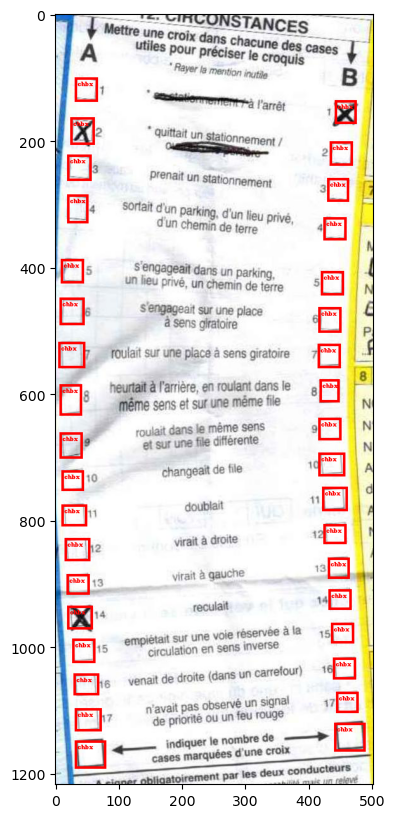

In [5]:
dataset.samples[0].visualize()

In [6]:
dataset.samples[0].annotations[0].box_format

'box_format: (xmin, ymin, xmax, ymax)'

In [7]:
train_dataset, valid_dataset = dataset.split(ratio_dataset1=0.8, seed=42)

In [8]:
train_dataset

Object detection dataset: 
	- 7 samples, 
	- 2 categories --> {1: 'chbx', 0: 'background'}

In [9]:
valid_dataset

Object detection dataset: 
	- 2 samples, 
	- 2 categories --> {1: 'chbx', 0: 'background'}

In [10]:
augmenter = Augmenter(train_dataset.samples)
new_train_samples = augmenter.run(n_augmented=300)

100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [00:05<00:00, 56.94it/s]


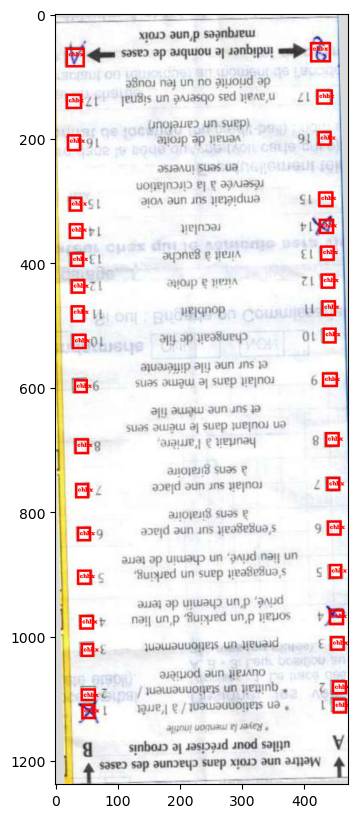

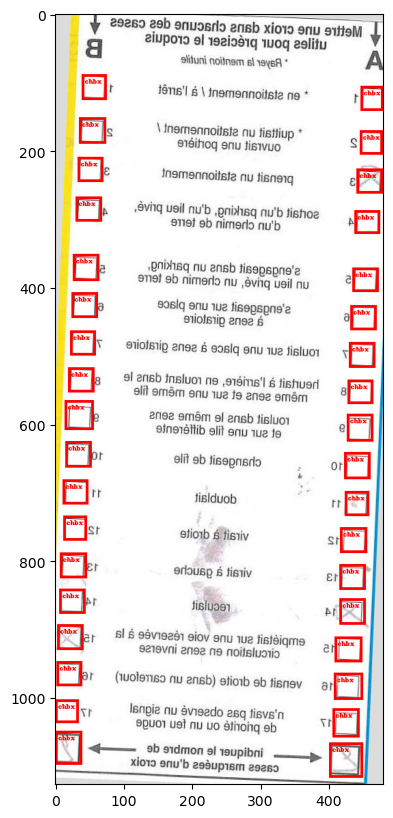

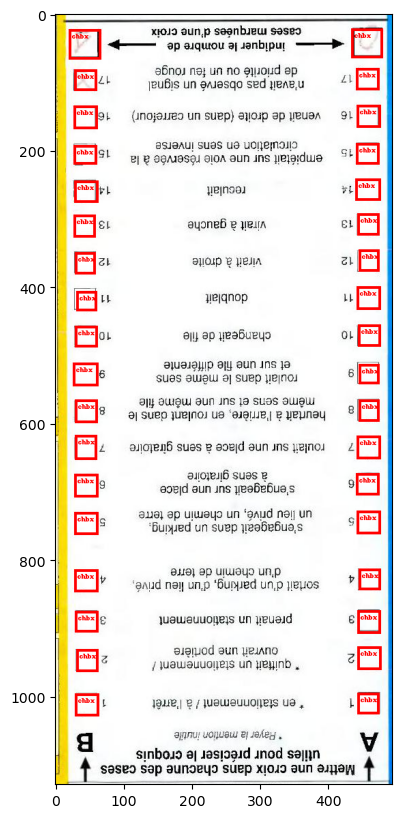

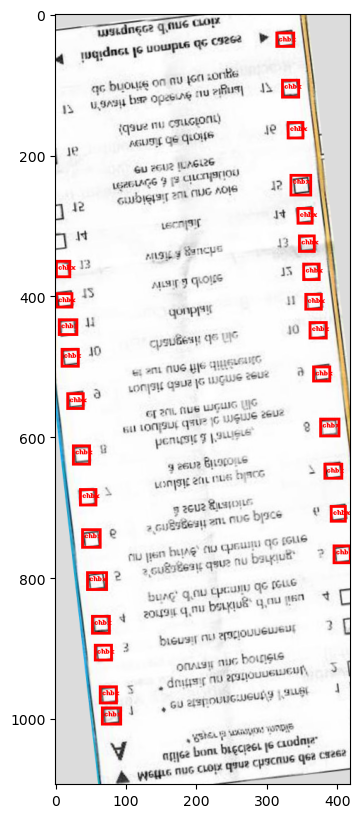

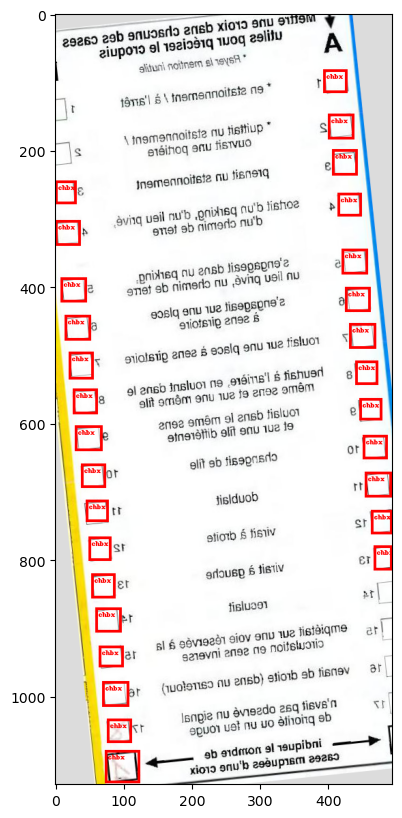

In [11]:
for sample in new_train_samples[:5]:
    sample.visualize(figsize=(12, 10))

In [12]:
new_train_samples[0]

Sample number 0:
	 - 36 annotations (included {'chbx'}) 
	 - img size --> (1238, 470)

In [13]:
augmented_train_dataset = Dataset(modeltype='object_detection', samples=new_train_samples)
augmented_train_dataset

Object detection dataset: 
	- 300 samples, 
	- 2 categories --> {1: 'chbx', 0: 'background'}

In [14]:
train_dataset.get_mean_size() / 4

array([282.57142857, 114.10714286])

In [15]:
from core.models.fastrcnn_model import FastRCNNModel

model = FastRCNNModel(train_dataset=augmented_train_dataset,
                      valid_dataset=valid_dataset,
                      cat_to_label=dataset.cat_to_label,
                      use_cpu_only=False)
model.train(n_epochs=10, batch_size=4, evaluate_train_set=False)

Using cuda...


Epoch 1/10:


  0%|                                                                                           | 0/75 [00:00<?, ?it/s]C:\Users\jules\OneDrive\Projets\IA_SOFTWARE\src\core\batch.py:82: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.bboxes = np.array(self.bboxes)
C:\Users\jules\OneDrive\Projets\IA_SOFTWARE\src\core\batch.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.areas = np.array(self.areas)
C:\Users\jules\OneDrive\Projets\IA_SOFTWARE\src\core\batch.py:84: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (

	--> lr: 0.000976 - loss: 1.162


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.10it/s]


map = 0.28137776255607605
map_50 = 0.8418533205986023
map_75 = 0.066676564514637
map_small = 0.2309947907924652
map_medium = 0.2757468521595001
map_large = -1.0
mar_1 = 0.01388888992369175
mar_10 = 0.0902777835726738
mar_100 = 0.41388893127441406
mar_small = 0.45192307233810425
mar_medium = 0.3149999976158142
mar_large = -1.0
map_per_class = 0.28137776255607605
mar_100_per_class = 0.41388893127441406

Epoch 2/10:


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [00:40<00:00,  1.83it/s]


	--> lr: 0.000905 - loss: 0.824


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.95it/s]


map = 0.4800321161746979
map_50 = 0.9695971012115479
map_75 = 0.4005938172340393
map_small = 0.36500871181488037
map_medium = 0.4907205402851105
map_large = -1.0
mar_1 = 0.02083333395421505
mar_10 = 0.15694443881511688
mar_100 = 0.5666666030883789
mar_small = 0.5826922655105591
mar_medium = 0.5249999761581421
mar_large = -1.0
map_per_class = 0.4800321161746979
mar_100_per_class = 0.5666666030883789

Epoch 3/10:


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [00:43<00:00,  1.72it/s]


	--> lr: 0.000794 - loss: 0.859


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.89it/s]


map = 0.38691839575767517
map_50 = 0.9425618648529053
map_75 = 0.20113049447536469
map_small = 0.2571878135204315
map_medium = 0.49300315976142883
map_large = -1.0
mar_1 = 0.011111111380159855
mar_10 = 0.13055555522441864
mar_100 = 0.47083336114883423
mar_small = 0.4615384638309479
mar_medium = 0.49500006437301636
mar_large = -1.0
map_per_class = 0.38691839575767517
mar_100_per_class = 0.47083336114883423

Epoch 4/10:


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [00:43<00:00,  1.72it/s]


	--> lr: 0.000655 - loss: 0.943


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.12it/s]


map = 0.3727015554904938
map_50 = 0.9400230050086975
map_75 = 0.17773492634296417
map_small = 0.2667662799358368
map_medium = 0.4199379086494446
map_large = -1.0
mar_1 = 0.009722222574055195
mar_10 = 0.12083332240581512
mar_100 = 0.44305554032325745
mar_small = 0.44999998807907104
mar_medium = 0.42500001192092896
mar_large = -1.0
map_per_class = 0.3727015554904938
mar_100_per_class = 0.44305554032325745

Epoch 5/10:


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [00:39<00:00,  1.88it/s]


	--> lr: 0.000500 - loss: 0.945


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.46it/s]


map = 0.45299428701400757
map_50 = 0.9599388837814331
map_75 = 0.3543274700641632
map_small = 0.3084205687046051
map_medium = 0.48827436566352844
map_large = -1.0
mar_1 = 0.011111111380159855
mar_10 = 0.14305554330348969
mar_100 = 0.5152777433395386
mar_small = 0.5019230842590332
mar_medium = 0.550000011920929
mar_large = -1.0
map_per_class = 0.45299428701400757
mar_100_per_class = 0.5152777433395386

Epoch 6/10:


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [00:36<00:00,  2.05it/s]


	--> lr: 0.000345 - loss: 0.992


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.04it/s]


map = 0.3827876150608063
map_50 = 0.925217866897583
map_75 = 0.14930780231952667
map_small = 0.2503751218318939
map_medium = 0.47698020935058594
map_large = -1.0
mar_1 = 0.008333333767950535
mar_10 = 0.1319444477558136
mar_100 = 0.43194442987442017
mar_small = 0.4153846204280853
mar_medium = 0.4749999940395355
mar_large = -1.0
map_per_class = 0.3827876150608063
mar_100_per_class = 0.43194442987442017

Epoch 7/10:


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [00:38<00:00,  1.94it/s]


	--> lr: 0.000206 - loss: 0.897


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.79it/s]


map = 0.44308194518089294
map_50 = 0.934852123260498
map_75 = 0.3574890196323395
map_small = 0.31415754556655884
map_medium = 0.48003315925598145
map_large = -1.0
mar_1 = 0.01527777872979641
mar_10 = 0.14861109852790833
mar_100 = 0.49722224473953247
mar_small = 0.5
mar_medium = 0.49000000953674316
mar_large = -1.0
map_per_class = 0.44308194518089294
mar_100_per_class = 0.49722224473953247

Epoch 8/10:


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [00:36<00:00,  2.05it/s]


	--> lr: 0.000095 - loss: 0.823


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.71it/s]


map = 0.4260551631450653
map_50 = 0.9318696856498718
map_75 = 0.21619804203510284
map_small = 0.3076070547103882
map_medium = 0.4821782112121582
map_large = -1.0
mar_1 = 0.01388888992369175
mar_10 = 0.1458333432674408
mar_100 = 0.493055522441864
mar_small = 0.49615389108657837
mar_medium = 0.48499998450279236
mar_large = -1.0
map_per_class = 0.4260551631450653
mar_100_per_class = 0.493055522441864

Epoch 9/10:


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [00:35<00:00,  2.14it/s]


	--> lr: 0.000024 - loss: 0.772


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.94it/s]


map = 0.43682509660720825
map_50 = 0.9390147924423218
map_75 = 0.26894086599349976
map_small = 0.31703460216522217
map_medium = 0.4909476935863495
map_large = -1.0
mar_1 = 0.01388888992369175
mar_10 = 0.14305554330348969
mar_100 = 0.4902777671813965
mar_small = 0.49038463830947876
mar_medium = 0.49000000953674316
mar_large = -1.0
map_per_class = 0.43682509660720825
mar_100_per_class = 0.4902777671813965

Epoch 10/10:


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [00:35<00:00,  2.12it/s]


	--> lr: 0.000000 - loss: 0.738


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.45it/s]


map = 0.4305712878704071
map_50 = 0.9390147924423218
map_75 = 0.24171149730682373
map_small = 0.3067724108695984
map_medium = 0.4894389510154724
map_large = -1.0
mar_1 = 0.01388888992369175
mar_10 = 0.14166668057441711
mar_100 = 0.48472222685813904
mar_small = 0.48269230127334595
mar_medium = 0.49000000953674316
mar_large = -1.0
map_per_class = 0.4305712878704071
mar_100_per_class = 0.48472222685813904


In [16]:
model.evaluate(augmented_train_dataset, batch_size=4)

100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [00:17<00:00,  4.32it/s]


map = 0.7323765754699707
map_50 = 0.9900515079498291
map_75 = 0.9413550496101379
map_small = 0.6922113299369812
map_medium = 0.6742022037506104
map_large = -1.0
mar_1 = 0.02395833283662796
mar_10 = 0.238992378115654
mar_100 = 0.7873998880386353
mar_small = 0.7708612084388733
mar_medium = 0.8331036567687988
mar_large = -1.0
map_per_class = 0.7323765754699707
mar_100_per_class = 0.7873998880386353


In [17]:
model.evaluate(valid_dataset, batch_size=4)

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.80it/s]


map = 0.4305712878704071
map_50 = 0.9390147924423218
map_75 = 0.24171149730682373
map_small = 0.3067724108695984
map_medium = 0.4894389510154724
map_large = -1.0
mar_1 = 0.01388888992369175
mar_10 = 0.14166668057441711
mar_100 = 0.48472222685813904
mar_small = 0.48269230127334595
mar_medium = 0.49000000953674316
mar_large = -1.0
map_per_class = 0.4305712878704071
mar_100_per_class = 0.48472222685813904


In [22]:
model.save("my_model")

In [15]:
from core.models.fastrcnn_model import FastRCNNModel

try:
    del model
except:
    pass
model = FastRCNNModel(model_ckpt_filepath="my_model")

Using cuda...



In [26]:
from core.sample.objectdetection_sample import ObjectDetectionSample

sample = ObjectDetectionSample(
    None, 
    'C:/Users/jules/OneDrive/Projets/IA_SOFTWARE/project-11-at-2022-09-26-15-40-4d1247ab/project-11-at-2022-09-26-15-40-4d1247ab/TEST/79.jpg'
)
predictions = model.predict([sample, sample])

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  5.09it/s]


In [27]:
sample_pred = ObjectDetectionSample.from_prediction(sample.get_img(), predictions[0], threshold=0.5)
sample_pred

Sample number 0:
	 - 34 annotations (included {'chbx'}) 
	 - img size --> (910, 366)

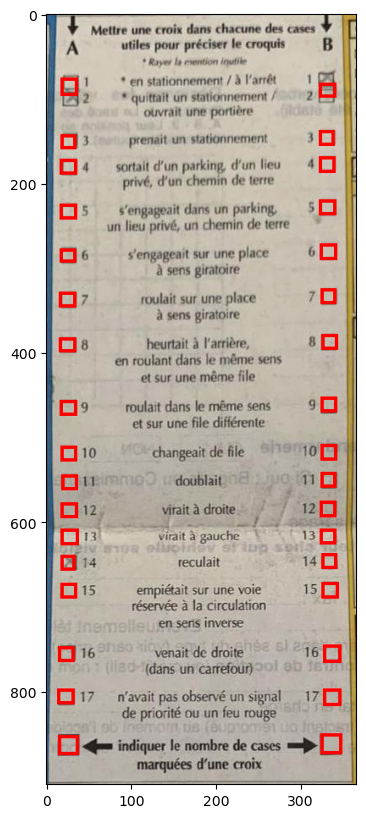

In [28]:
sample_pred.visualize()